In [1]:
import m_nn
import torch
import pennylane as qml
from pennylane import numpy as np

ValueError: prep operation Controlled(QubitStateVector(tensor([0.5000+0.j, 0.5000+0.j, 0.5000+0.j, 0.5000+0.j],
       dtype=torch.complex128), wires=[3, 4]), control_wires=[0, 1, 2]) must occur prior to ops. Please place earlier in the queue.

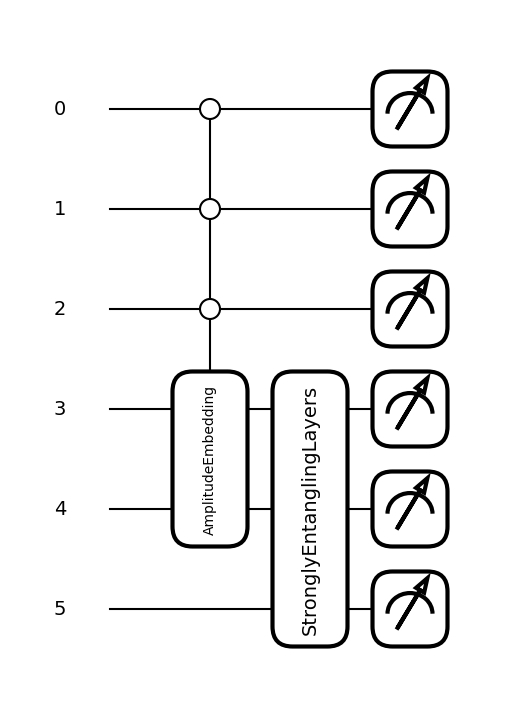

In [2]:
gnn_idx_qubits = 3
gnn_nn_qubits  = 3
gnn_qubits     = gnn_idx_qubits + gnn_nn_qubits
num_layers     = 1
num_reupload   = 0

def ctrl_enc_operator(_input, control, control_values):
    ctrl = qml.ctrl(qml.AmplitudeEmbedding, control=control, control_values=control_values)
    ctrl(features=_input, wires=range(gnn_idx_qubits, gnn_idx_qubits+2), normalize=True, pad_with=np.pi/2)

model = m_nn.QuantumDisorderedFCGraph(gnn_idx_qubits, gnn_nn_qubits, num_layers, num_reupload, ctrl_enc_operator)
qml.draw_mpl(model.circuit)(torch.tensor([np.pi/2, np.pi/2, np.pi/2]), torch.rand(num_reupload+1, num_layers, gnn_nn_qubits, 3))

model(torch.tensor([np.pi/2, np.pi/2, np.pi/2]))

In [3]:
qml.matrix(qml.AmplitudeEmbedding(torch.rand(4), wires=range(2), normalize=True))

tensor([[ 0.4381+0.j, -0.3034+0.j, -0.6957+0.j,  0.4818+0.j],
        [ 0.3034+0.j,  0.4381+0.j, -0.4818+0.j, -0.6957+0.j],
        [ 0.4294+0.j, -0.7291+0.j,  0.2704+0.j, -0.4592+0.j],
        [ 0.7291+0.j,  0.4294+0.j,  0.4592+0.j,  0.2704+0.j]],
       dtype=torch.complex128)